In [ ]:
# %pip install tensorflow-addons
# %pip uninstall tensorflow-addons
# %pip install tqdm scikit-learn
# %pip install fastparquet pyarrow
# %pip install tensorflow-addons seaborn fastparquet

  Using cached cramjam-2.9.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (4.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.7/684.7 kB 7.1 MB/s eta 0:00:00
Using cached cramjam-2.9.0-cp39-cp39-macosx_11_0_arm64.whl (1.9 MB)
Note: you may need to restart the kernel to use updated packages.
  Using cached tensorflow_addons-0.23.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (1.8 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached typeguard-2.13.3-py3-none-any.whl.metadata (3.6 kB)
Using cached tensorflow_addons-0.23.0-cp39-cp39-macosx_11_0_arm64.whl (12.6 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached typeguard-2.13.3-py3-none-any.whl (17 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
# import tensorflow_addons as tfa
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sn

from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split, GroupShuffleSplit 

import glob
import sys
import os
import math
import gc
import sys
import sklearn
import scipy
import ast
import pyarrow
import fastparquet

# print(f'Tensorflow V{tf.__version__}')
# print(f'Keras V{tf.keras.__version__}')
# print(f'Python V{sys.version}')

/Users/theerat/Documents/sign-language-translator/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# LSTM

In [88]:
from sklearn.model_selection import train_test_split
from keras import utils

In [89]:
words = os.listdir('/Users/theerat/Dataset/25VDO')

In [90]:
words

['.DS_Store',
 'ฟ',
 'ธ',
 'ม',
 'ศ',
 'ถ',
 'ค',
 'ช',
 'ญ',
 'น',
 'พ',
 'ง',
 'ฎ',
 'ฉ',
 'ย',
 'ล',
 'ฬ',
 'ห',
 'ฏ',
 'ฆ',
 'ก',
 'ณ',
 'อ',
 'ด',
 'ฝ',
 'ร']

In [91]:
words.remove('.DS_Store')

In [92]:
words_np = np.array(words)

In [94]:
DATA_PATH = os.path.join('/Users/theerat/Dataset/25VDO')

sequence_length = 30
no_sequences = 30

In [95]:
label_map = {label:num for num, label in enumerate(words_np)}

In [96]:
label_map

{np.str_('ฟ'): 0,
 np.str_('ธ'): 1,
 np.str_('ม'): 2,
 np.str_('ศ'): 3,
 np.str_('ถ'): 4,
 np.str_('ค'): 5,
 np.str_('ช'): 6,
 np.str_('ญ'): 7,
 np.str_('น'): 8,
 np.str_('พ'): 9,
 np.str_('ง'): 10,
 np.str_('ฎ'): 11,
 np.str_('ฉ'): 12,
 np.str_('ย'): 13,
 np.str_('ล'): 14,
 np.str_('ฬ'): 15,
 np.str_('ห'): 16,
 np.str_('ฏ'): 17,
 np.str_('ฆ'): 18,
 np.str_('ก'): 19,
 np.str_('ณ'): 20,
 np.str_('อ'): 21,
 np.str_('ด'): 22,
 np.str_('ฝ'): 23,
 np.str_('ร'): 24}

อัดไฟล์

In [132]:
filtered_words = np.array(list(filter(lambda word: word != '.DS_Store', label_map)))

In [133]:
filtered_words

array(['ฟ', 'ธ', 'ม', 'ศ', 'ถ', 'ค', 'ช', 'ญ', 'น', 'พ', 'ง', 'ฎ', 'ฉ',
       'ย', 'ล', 'ฬ', 'ห', 'ฏ', 'ฆ', 'ก', 'ณ', 'อ', 'ด', 'ฝ', 'ร'],
      dtype='<U1')

In [134]:
sequences, labels = [], []
for action in words_np:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [135]:
X = np.array(sequences)

In [136]:
y = utils.to_categorical(labels).astype(int)

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [107]:
words_np.shape[0]

25

In [ ]:
# ใช้สำหรับไฟล์ของเรา
sequences, labels = [], []
for action in words:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            csv_path = os.path.join(DATA_PATH, action, str(sequence), f'{frame_num}.csv')
            print(f'Loading: {csv_path}')
            res = pd.read_csv(csv_path)
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [138]:
df = pd.DataFrame({'sequence':sequences, 'label':labels})
df

,sequence,label
0,"[[0.5624345541000366, 0.46014106273651123, -0....",0
1,"[[0.5681307911872864, 0.43512317538261414, -0....",0
2,"[[0.5066099166870117, 0.437534362077713, -0.48...",0
3,"[[0.4978330135345459, 0.4397716224193573, -0.3...",0
4,"[[0.5157800316810608, 0.4379734396934509, -0.3...",0
...,...,...
745,"[[0.5171130895614624, 0.4378897249698639, -0.4...",24
746,"[[0.5187970399856567, 0.4398413300514221, -0.4...",24
747,"[[0.5178784132003784, 0.439040869474411, -0.42...",24
748,"[[0.5121309757232666, 0.43361032009124756, -0....",24


In [139]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape    

((712, 30, 1662), (38, 30, 1662), (712, 25), (38, 25))

In [140]:
X.shape

(750, 30, 1662)

In [193]:
y_train_sparse = np.argmax(y_train, axis=-1)

In [141]:
input_shape = (30, 1662)  # 39 timesteps, 1662 features
num_classes = 25

In [ ]:
from keras import models, layers, callbacks


In [150]:
log_dir = os.path.join('Logs')
tb_callback = callbacks.TensorBoard(log_dir=log_dir)
#While training access tensorboard
#tensorboard --logdir=.

In [147]:
model = models.Sequential()
model.add(layers.LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(layers.LSTM(128, return_sequences=True, activation='relu'))
model.add(layers.LSTM(64, return_sequences=False, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(25, activation='softmax'))


/Users/theerat/Documents/sign-language-translator/.venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [149]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_29 (LSTM)                  │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_30 (LSTM)                  │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_31 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 25)             │           825 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 597,401 (2.28 MB)

 Trainable params: 597,401 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

__New Model__

In [178]:
from keras import callbacks, Model, Input

In [176]:
# include early stopping and reducelr
def get_callbacks():
    return [
        callbacks.EarlyStopping(
            monitor="val_accuracy", patience=10, restore_best_weights=True
        ),
        callbacks.ReduceLROnPlateau(
            monitor="val_accuracy", factor=0.5, patience=3
        ),
    ]


# a single dense block followed by a normalization block and relu activation
def dense_block(units, name):
    fc = layers.Dense(units)
    norm = layers.LayerNormalization()
    act = layers.Activation("relu")
    drop = layers.Dropout(0.1)
    return lambda x: drop(act(norm(fc(x))))


# the lstm block with the final dense block for the classification
def classifier(lstm_units):
    lstm = layers.LSTM(lstm_units)
    out = layers.Dense(25, activation="softmax")
    return lambda x: out(lstm(x))

In [189]:
y_test.shape

(38, 25)

In [190]:
from keras import optimizers

In [ ]:
import tensorflow as tf
from keras import layers, Model, Input, callbacks,optimizers

encoder_units = [512, 256]
lstm_units = 500  

inputs = Input(shape=(30, 1662))

x = inputs
for i, n in enumerate(encoder_units):
    x = dense_block(n, f"encoder_{i}")(x)

out = classifier(lstm_units)(x)

model = Model(inputs=inputs, outputs=out)
model.compile(optimizer=optimizers.Adam(), loss="categorical_crossentropy", metrics=["accuracy"])
callbacks_list = get_callbacks()
model.summary()

Model: "functional_113"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_31 (InputLayer)     │ (None, 30, 1662)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 30, 512)        │       851,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_36          │ (None, 30, 512)        │         1,024 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_36 (Activation)      │ (None, 30, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_61 (Dropout)            │ (None, 30, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 30, 256)        │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_37          │ (None, 30, 256)        │           512 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_37 (Activation)      │ (None, 30, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 30, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_49 (LSTM)                  │ (None, 500)            │     1,514,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 25)             │        12,525 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,510,845 (9.58 MB)

 Trainable params: 2,510,845 (9.58 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
                        X_train,
                        y_train,
                        epochs=180,
                        batch_size=32,
                        validation_split=0.2,
                        callbacks=callbacks_list,
                        verbose=1
                    )

Epoch 1/180
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 278ms/step - accuracy: 0.0283 - loss: 3.3878 - val_accuracy: 0.0070 - val_loss: 3.2759 - learning_rate: 0.0010
Epoch 2/180
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 272ms/step - accuracy: 0.0737 - loss: 3.2428 - val_accuracy: 0.0140 - val_loss: 3.2505 - learning_rate: 0.0010
Epoch 3/180
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 283ms/step - accuracy: 0.0525 - loss: 3.2305 - val_accuracy: 0.0420 - val_loss: 3.2338 - learning_rate: 0.0010
Epoch 4/180
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 260ms/step - accuracy: 0.0321 - loss: 3.2222 - val_accuracy: 0.0070 - val_loss: 3.2554 - learning_rate: 0.0010
Epoch 5/180
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 259ms/step - accuracy: 0.0496 - loss: 3.2208 - val_accuracy: 0.0350 - val_loss: 3.2504 - learning_rate: 0.0010
Epoch 6/180
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 249ms/step - accuracy: 0.0475 - loss: 3.2270 - val_accuracy: 0.0070 - val_loss: 3.2353 - learning_rate: 0.0010
Epoch 7/180
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 256ms/step - accuracy: 0.0701 - loss: 3.

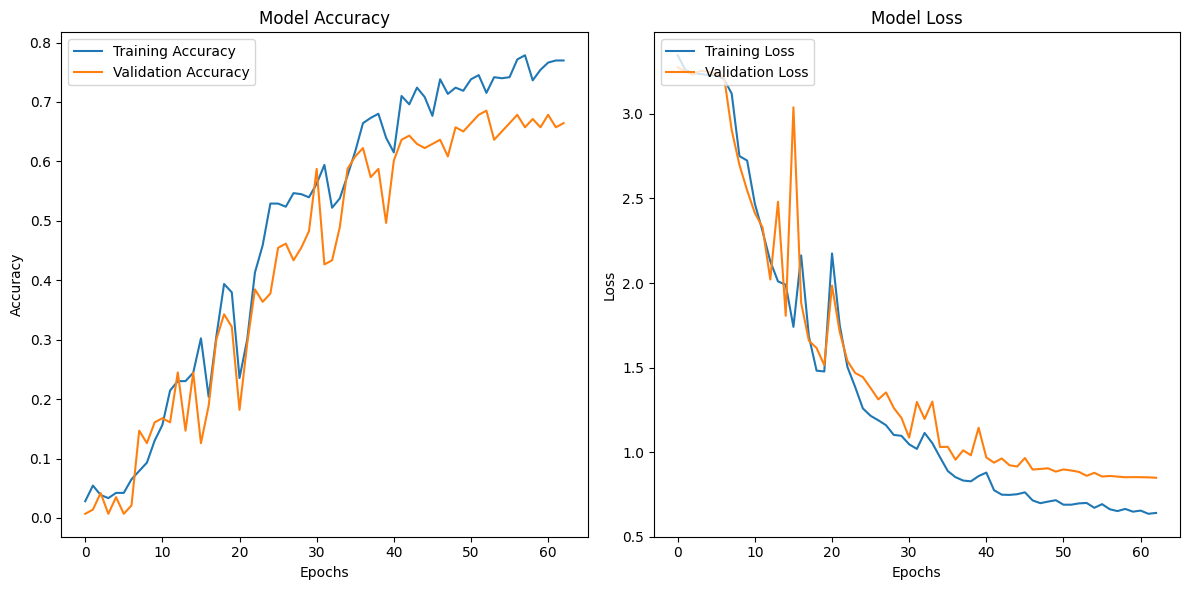

In [211]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')

# Show the plots
plt.tight_layout()
plt.show()


# __Transformer__

In [3]:
# MatplotLib Global Settings
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['axes.titlesize'] = 24

In [4]:
# If True, processing data from scratch
# If False, loads preprocessed data
PREPROCESS_DATA = False
TRAIN_MODEL = True
# True: use 10% of participants as validation set
# False: use all data for training -> gives better LB result
USE_VAL = False

N_ROWS = 543
N_DIMS = 3
DIM_NAMES = ['x', 'y', 'z']
SEED = 42
NUM_CLASSES = 100
IS_INTERACTIVE = True
VERBOSE = 1 if IS_INTERACTIVE else 2

INPUT_SIZE = 64

BATCH_ALL_SIGNS_N = 4
BATCH_SIZE = 32
N_EPOCHS = 100
LR_MAX = 1e-3
N_WARMUP_EPOCHS = 0
WD_RATIO = 0.05
MASK_VAL = 4237

In [5]:
def print_shape_dtype(l, names):
    for e, n in zip(l, names):
        print(f'{n} shape: {e.shape}, dtype: {e.dtype}')

In [12]:
#for csv file
import os
import pandas as pd

folder_path = '/Users/theerat/Downloads/บ้าน-2'
data = []

for subfolder in os.listdir(folder_path):
    subfolder_path = os.path.join(folder_path, subfolder)
    
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if filename.endswith('.csv'):
                file_path = os.path.join(subfolder_path, filename)
                sequence_id = int(filename.split('_')[1].split('.')[0])  # ได้ sequence_id จากชื่อไฟล์
                participant_id = 70
                sign = 'บ้าน'

                # เพิ่มข้อมูลลงใน list
                data.append({
                    'path': file_path,
                    'participant_id': participant_id,
                    'sequence_id': sequence_id,
                    'sign': sign
                })

# สร้าง DataFrame จากข้อมูลที่เก็บรวบรวม
df = pd.DataFrame(data)

df = df.sort_values(by='sequence_id')

# บันทึกเป็นไฟล์ CSV
df.to_csv('output.csv', index=False)


In [23]:
import os
import numpy as np
import pandas as pd

folder_path = '/Users/theerat/Downloads/MP_DATA3/คุย'
data = []
participant_id = 0

# อ่านโฟลเดอร์ทั้งหมดภายใน
for subfolder in os.listdir(folder_path):
    subfolder_path = os.path.join(folder_path, subfolder)
    
    if os.path.isdir(subfolder_path):
        # อ่านไฟล์ .npy ภายในแต่ละโฟลเดอร์
        for filename in os.listdir(subfolder_path):
            if filename.endswith('.npy'):
                file_path = os.path.join(subfolder_path, filename)
                sequence_id = int(filename.split('.')[0])  # ได้ sequence_id จากชื่อไฟล์
                sign = 'ก'

                # เพิ่มข้อมูลลงใน list
                data.append({
                    'path': file_path,
                    'participant_id': participant_id,
                    'sequence_id': sequence_id,
                    'sign': sign
                })
                participant_id += 1


# สร้าง DataFrame จากข้อมูลที่เก็บรวบรวม
df = pd.DataFrame(data)

df = df.sort_values(by='sequence_id')
# บันทึกเป็นไฟล์ CSV
df.to_csv('outputnpy.csv', index=False)


In [24]:
pd.read_csv('outputnpy.csv')

,path,participant_id,sequence_id,sign
0,/Users/theerat/Downloads/MP_DATA3/คุย/17/0.npy,76,0,ก
1,/Users/theerat/Downloads/MP_DATA3/คุย/15/0.npy,166,0,ก
2,/Users/theerat/Downloads/MP_DATA3/คุย/3/0.npy,196,0,ก
3,/Users/theerat/Downloads/MP_DATA3/คุย/4/0.npy,136,0,ก
4,/Users/theerat/Downloads/MP_DATA3/คุย/2/0.npy,226,0,ก
...,...,...,...,...
235,/Users/theerat/Downloads/MP_DATA3/คุย/4/29.npy,140,29,ก
236,/Users/theerat/Downloads/MP_DATA3/คุย/29/29.npy,50,29,ก
237,/Users/theerat/Downloads/MP_DATA3/คุย/3/29.npy,200,29,ก
238,/Users/theerat/Downloads/MP_DATA3/คุย/15/29.npy,170,29,ก


In [6]:
word_list = { "สวัสดี": 0,
 "ตก": 1,
 "รอ": 2,
 "กลับ": 3,
 "ขอบคุณ": 4,
 "ตัด": 5,
 "ลง": 6,
 "ขึ้น": 7,
 "เฝ้า": 8,
 "คุย": 9,
 "ช่วย": 10,
 "เชื่อ": 11,
 "ฟัง": 12,
 "มอง": 13,
 "พา": 14,
 "ชวน หลีกภัย": 15,
 "ทักษิณ ชินวัตร": 16,
 "ขนม": 17,
 "พิธา ลิ้มเจริญรัตน์": 18,
 "ศิริกัญญา ตันสกุล": 19,
 "แบก": 20,
 "อนุทิน ชาญวีรกูล": 21,
 "รังสิมันต์ โรม": 22,
 "พีระพันธุ์ สาลีรัฐวิภาค": 23,
 "คุณหญิงสุดารัตน์ เกยุราพันธุ์": 24,
 "พลเอกอนุพงษ์ เผ่าจินดา": 25,
 "สุวัจน์ ลิปตพัลลภ": 26,
 "กรณ์ จาติกวณิช": 27,
 "วราวุธ ศิลปะอาชา": 28,
 "พล.ต.อ.เสรีพิศุทธ์ เตมียเวสวราวุธ ศิลปะอาชา": 29,
 "ศักดิ์สยาม ชิดชอบ": 30,
 "ชาดา ไทยเศรษฐ์": 31,
 "สุชัชวีร์ สุวรรณสวัสดิ์": 32,
 "จุรินทร์ ลักษณวิศิษฏ์": 33,
 "ไตรรงค์ สุวรรณคีรี": 34,
 "พลเอกประยุทธ์ จันทร์โอชา": 35,
 "นฤมล ภิญโญสินวัฒน์": 36,
 "ธรรมนัส พรหมเผ่า": 37,
 "ชัยวุฒิ ธนาคมานุสรณ์": 38,
 "ไพบูลย์ นิติตะวัน": 39,
 "พลเอกประวิตร วงษ์สุวรรณ": 40,
 "พริษฐ์ วัชรสินธุ": 41,
 "ยิ่งลักษณ์ ชินวัตร": 42,
 "ณัฐวุฒิ ใสยเกื้อ": 43,
 "นพ.ชลน่าน ศรีแก้ว": 44,
 "เศรษฐา ทวีสิน": 45,
 "แพทองธาร ชินวัตร": 46,
 "อะไร": 47,
 "สมัคร": 48,
 "กระโดด": 49,
 "ยก": 50,
 "ชน": 51,
 "ผ่าน": 52,
 "แนะนำ": 53,
 "จำได้": 54,
 "ปลูก": 55,
 "รวม": 56,
 "ทำหาย": 57,
 "เจอ": 58,
 "หาย": 59,
 "พนักงานขาย": 60,
 "นักเขียนโปรแกรม": 61,
 "พ่อครัว": 62,
 "เจ้าหน้าที่ตำรวจ": 63,
 "เนื้อลูกแกะ": 64,
 "เนื้อหมู": 65,
 "คุณสบายดีไหม": 66,
 "ดูเหมือน": 67,
 "วาง": 68,
 "อยู่": 69,
 "ก": 70,
 "ข": 71,
 "ค": 72,
 "ฆ": 73,
 "ต": 74,
 "ถ": 75,
 "ง": 76,
 "จ": 77,
 "ฉ": 78,
 "ช": 79,
 "ซ": 80,
 "ฏ": 81,
 "ฐ": 82,
 "ฑ": 83,
 "ฒ": 84,
 "ณ": 85,
 "ด": 86,
 "ท": 87,
 "ธ": 88,
 "น": 89,
 "บ": 90,
 "ป": 91,
 "ผ": 92,
 "ฝ": 93,
 "พ": 94,
 "ฟ": 95,
 "ภ": 96,
 "ม": 97,
 "ย": 98,
 "ร": 99,
 "ล": 100,
 "ว": 101,
 "ศ": 102,
 "ษ": 103,
 "ส": 104,
 "ห": 105,
 "ฬ": 106,
 "อ": 107,
 "ฮ": 108,
 "ญ": 109,
 "ฎ": 110
}


In [ ]:

# กำหนด path ของโฟลเดอร์ที่ต้องการอ่าน
base_path = '/Users/theerat/Downloads/MP_DATA3'
# สร้างลิสต์เพื่อเก็บข้อมูล
data = []


# อ่านข้อมูลจากโฟลเดอร์และไฟล์
for folder_name, participant_id in word_list.items():
    folder_path = os.path.join(base_path, folder_name)
    print(folder_path)
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path):
            for i in range(30):  # อ่านไฟล์จาก 0 ถึง 29
                file_path = os.path.join(subfolder_path, f"{i}.npy")
                try:
                    # โหลดข้อมูลจากไฟล์ .npy
                    data_array = np.load(file_path)
                    sign = os.path.basename(folder_path)  # ชื่อโฟลเดอร์เป็น sign
                    for sequence_id, value in enumerate(data_array):
                        # เพิ่มข้อมูลลงในลิสต์
                        data.append({
                            'path': file_path,
                            'participant_id': participant_id,
                            'sequence_id': sequence_id,
                            'sign': sign
                        })
                except FileNotFoundError:
                    # ข้ามไฟล์ที่ไม่พบ
                    pass

# สร้าง DataFrame จากลิสต์ข้อมูล
df = pd.DataFrame(data)
df.to_csv('outputnpy.csv', index=False)
# แสดงข้อมูล
print(df)


/Users/theerat/Downloads/MP_DATA3/สวัสดี
/Users/theerat/Downloads/MP_DATA3/ตก
/Users/theerat/Downloads/MP_DATA3/รอ
/Users/theerat/Downloads/MP_DATA3/กลับ
/Users/theerat/Downloads/MP_DATA3/ขอบคุณ
/Users/theerat/Downloads/MP_DATA3/ตัด
/Users/theerat/Downloads/MP_DATA3/ลง
/Users/theerat/Downloads/MP_DATA3/ขึ้น
/Users/theerat/Downloads/MP_DATA3/เฝ้า
/Users/theerat/Downloads/MP_DATA3/คุย
/Users/theerat/Downloads/MP_DATA3/ช่วย
/Users/theerat/Downloads/MP_DATA3/เชื่อ
/Users/theerat/Downloads/MP_DATA3/ฟัง
/Users/theerat/Downloads/MP_DATA3/มอง
/Users/theerat/Downloads/MP_DATA3/พา
/Users/theerat/Downloads/MP_DATA3/ชวน หลีกภัย
/Users/theerat/Downloads/MP_DATA3/ทักษิณ ชินวัตร
/Users/theerat/Downloads/MP_DATA3/ขนม
/Users/theerat/Downloads/MP_DATA3/พิธา ลิ้มเจริญรัตน์
/Users/theerat/Downloads/MP_DATA3/ศิริกัญญา ตันสกุล
/Users/theerat/Downloads/MP_DATA3/แบก
/Users/theerat/Downloads/MP_DATA3/อนุทิน ชาญวีรกูล
/Users/theerat/Downloads/MP_DATA3/รังสิมันต์ โรม
/Users/theerat/Downloads/MP_DATA3/พีระพันธุ์ 

In [35]:
base_path = '/Users/theerat/Downloads/MP_DATA3'
data = []
id = 0
for folder_name, participant_id in word_list.items():
    folder_path = os.path.join(base_path, folder_name)
    for subfolder in os.listdir(folder_path):
        if subfolder == '.DS_Store':
                continue
        subfolder_path = os.path.join(folder_path, subfolder)
        sign = os.path.basename(folder_path)
        
        for i in os.listdir(subfolder_path):
            if i == '.DS_Store':
                continue
            npy_path = os.path.join(subfolder_path, i)
            sequence_id = os.path.splitext(i)[0]
            data.append({
                'path': npy_path,
                'participant_id': participant_id,
                'sequence_id': sequence_id,
                'sign': sign
            })
            
            
    id += 1
df = pd.DataFrame(data)
df_sorted = df.sort_values(by=['participant_id', 'sequence_id']).reset_index(drop=True)
df

,path,participant_id,sequence_id,sign
0,/Users/theerat/Downloads/MP_DATA3/สวัสดี/20/20...,0,20,สวัสดี
1,/Users/theerat/Downloads/MP_DATA3/สวัสดี/20/21...,0,21,สวัสดี
2,/Users/theerat/Downloads/MP_DATA3/สวัสดี/20/23...,0,23,สวัสดี
3,/Users/theerat/Downloads/MP_DATA3/สวัสดี/20/22...,0,22,สวัสดี
4,/Users/theerat/Downloads/MP_DATA3/สวัสดี/20/26...,0,26,สวัสดี
...,...,...,...,...
36414,/Users/theerat/Downloads/MP_DATA3/ฎ/25/17.npy,110,17,ฎ
36415,/Users/theerat/Downloads/MP_DATA3/ฎ/25/13.npy,110,13,ฎ
36416,/Users/theerat/Downloads/MP_DATA3/ฎ/25/12.npy,110,12,ฎ
36417,/Users/theerat/Downloads/MP_DATA3/ฎ/25/10.npy,110,10,ฎ


In [37]:
new_df = pd.read_csv('train.csv')

In [42]:
df = new_df.sort_values(by=['sequence_id']).reset_index(drop=False)
df

,index,path,participant_id,sequence_id,sign
0,2389,สวัสดี\22.parquet,22,0,สวัสดี
1,2377,สวัสดี\1.parquet,1,0,สวัสดี
2,2378,สวัสดี\10.parquet,10,0,สวัสดี
3,2379,สวัสดี\11.parquet,11,0,สวัสดี
4,2380,สวัสดี\12.parquet,12,0,สวัสดี
...,...,...,...,...,...
2992,723,ฎ\4.parquet,4,110,ฎ
2993,724,ฎ\5.parquet,5,110,ฎ
2994,725,ฎ\6.parquet,6,110,ฎ
2995,727,ฎ\8.parquet,8,110,ฎ


In [49]:
base_path = '/Users/theerat/Downloads/MP_DATA3'
data = []
id = 0
for folder_name, participant_id in word_list.items():
    folder_path = os.path.join(base_path, folder_name)
    for subfolder in os.listdir(folder_path):
        if subfolder == '.DS_Store':
                continue
        subfolder_path = os.path.join(folder_path, subfolder)
        sign = os.path.basename(folder_path)
        
        for filename in os.listdir(subfolder_path):
            if filename.endswith('.npy') and filename != '.DS_Store':
                file_path = os.path.join(subfolder_path, filename)
                try:
                    np_data = np.load(file_path)
                except Exception as e :
                    print('Error')
                    continue
                for seq_id, value in enumerate(np_data):
                    data.append({
                            'path': file_path,
                            'participant_id': participant_id,
                            'sequence_id': seq_id,
                            'sign': sign
                        })
                    
            #อ่านค่า npy แต่ละไฟล์ละนำมาเก็บเป็น parquet file ตามแต่ละ subfolder
        

            
    id += 1
df = pd.DataFrame(data)
df_sorted = df.sort_values(by=['participant_id', 'sequence_id']).reset_index(drop=True)
df

KeyboardInterrupt: 

In [64]:
def create_landmark_rows(landmarks, frame, index, type_label):
    for landmark_index, (x, y, z) in enumerate(landmarks):
        new_row = {
            'frame': frame,
            'row_id': f'{folder_name}-{index}',
            'type': type_label,
            'landmark_index': landmark_index,
            'x': x,
            'y': y,
            'z': z
        }
    yield new_row

In [75]:
import os
import pandas as pd
import ast

base_path = '/Users/theerat/Downloads/MP_DATA3/สวัสดี'
output_path = 'outputnpy.parqute'

combined_df = pd.DataFrame()

for folder in os.listdir(base_path):
    if folder != '.DS_Store':
        folder_path = os.path.join(base_path, folder)
        
        for file in os.listdir(folder_path):
            if file == '.DS_Store':
                continue
            file_path = os.path.join(folder_path, file)
            print(file_path)
            
            try:
                df = pd.read_csv(file_path, encoding='ISO-8859-1')
                
                print("Columns:", df.columns)
                print("First rows:\n", df.head())

                # Strip whitespace from column names
                df.columns = df.columns.str.strip()

                new_rows = []  # List to hold new rows
                
                for index, row in df.iterrows():
                    body_landmarks = ast.literal_eval(row['Body'])
                    right_landmarks = ast.literal_eval(row['Right'])
                    left_landmarks = ast.literal_eval(row['Left'])

                    new_rows.extend(create_landmark_rows(body_landmarks, i, index, 'body'))
                    new_rows.extend(create_landmark_rows(right_landmarks, i, index, 'right'))
                    new_rows.extend(create_landmark_rows(left_landmarks, i, index, 'left'))

                # Append the new rows to combined_df
                combined_df = pd.concat([combined_df, pd.DataFrame(new_rows)], ignore_index=True)
            
            except Exception as e:
                print(f"Error processing file {file_path}: {e}")

# Save combined_df to the output path if needed
combined_df.to_parquet(output_path)

print("Processing completed. Final folder processed:", folder)


/Users/theerat/Downloads/MP_DATA3/สวัสดี/20/20.npy
Columns: Index(['NUMPY', ' 'fortran_order': False', ' 'shape': (1662', ')',
       ' }                                                         '],
      dtype='object')
First rows:
   NUMPY  'fortran_order': False  'shape': (1662   )  \
0     NaN                     NaN             NaN NaN   
1      ß?                     Qö?             NaN NaN   
2       ?                     ~Ô?             NaN NaN   
3      Ø?                     NaN             NaN NaN   
4      Ð?                     Út¿             NaN NaN   

    }                                                           
0                                                NaN            
1                                                NaN            
2                                                NaN            
3                                                NaN            
4                                                NaN            
Error processing file /Users/the

In [82]:
df = pd.read_parquet('outputnpy.parquet')

FileNotFoundError: [Errno 2] No such file or directory: 'outputnpy.parquet'